In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import numpy as np
import sklearn 
import seaborn as sns
sns.set()

In [2]:
from binance.client import Client

In [3]:
client = Client('qIHk3sizEF3dsINc0uJpHJ4FdYq3eG8ZKvrKexcyRuy6uW3gZkXEqfaLYBQbPYVg','KYKMvaLLJ4hghzupV2M7SKpv1cYskf6D0vFq3wSwvmKW4EFD57a7zX1KELRGKCmR')

In [4]:
symbol = 'BTCUSDT'
BTC = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY,  "1 Dec, 2016")

In [5]:
BTC = pd.DataFrame(BTC, columns= ['Open_Time','Open','High','Low','Close','Volume','Close_Time','Quote_Asset_Volume','Num_Trades','Taker_Buy_Base_Asset volume','Taker_Buy_Quote_Asset_Volume','IGNORE'])

In [285]:
BTC.head()

,Open_Time,Open,High,Low,Close,Volume,Close_Time,Quote_Asset_Volume,Num_Trades,Taker_Buy_Base_Asset volume,Taker_Buy_Quote_Asset_Volume,IGNORE
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,8733.91139481
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,9384.14140858
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,9184.08552906
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,10125.41408414
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,11706.76997007


In [7]:
df_BTC = BTC.copy()

In [8]:
df_BTC['Open_Time'] = pd.to_datetime(df_BTC['Open_Time'], unit='ms')

In [9]:
df_BTC.index = pd.DatetimeIndex(df_BTC['Open_Time'], freq='D')
df_BTC.drop(['Open_Time'], axis=1, inplace=True)
df_BTC.dtypes

Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close_Time                       int64
Quote_Asset_Volume              object
Num_Trades                       int64
Taker_Buy_Base_Asset volume     object
Taker_Buy_Quote_Asset_Volume    object
IGNORE                          object
dtype: object

In [10]:
for col in df_BTC.columns:
    if df_BTC[col].dtypes ==object:
        df_BTC[col] = df_BTC[col].astype(float)

In [11]:
df_BTC = df_BTC.round(2)

In [12]:
df_BTC.dtypes

Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Close_Time                        int64
Quote_Asset_Volume              float64
Num_Trades                        int64
Taker_Buy_Base_Asset volume     float64
Taker_Buy_Quote_Asset_Volume    float64
IGNORE                          float64
dtype: object

In [13]:
BTC_d2017 =  pd.DataFrame(df_BTC['Close']).loc['2017-10-02':]

In [14]:
BTC_d2017.index

DatetimeIndex(['2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05',
               '2017-10-06', '2017-10-07', '2017-10-08', '2017-10-09',
               '2017-10-10', '2017-10-11',
               ...
               '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05',
               '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09',
               '2019-07-10', '2019-07-11'],
              dtype='datetime64[ns]', name='Open_Time', length=648, freq='D')

In [292]:
import datetime, quandl
quandl.ApiConfig.api_key = "uTy1aXu8xnKfp8cT4GeK"

ndq = pd.DataFrame(quandl.get("NASDAQOMX/COMP-NASDAQ", 
              trim_start='2017-09-30', 
              trim_end='2019-07-10'))

ndq.tail(4)

,Index Value,High,Low,Total Market Value,Dividend Market Value
Trade Date,,,,,
2019-07-05,8161.79,8171.97,8093.66,1.221816e+13,12713774.0
2019-07-08,8098.38,8112.91,8078.39,1.212336e+13,80244524.0
2019-07-09,8141.73,8146.98,8061.32,1.218826e+13,168139791.0
2019-07-10,8202.53,8228.60,8160.56,1.227944e+13,13312659.0


In [16]:
ndq.index

DatetimeIndex(['2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05',
               '2017-10-06', '2017-10-09', '2017-10-10', '2017-10-11',
               '2017-10-12', '2017-10-13',
               ...
               '2019-06-26', '2019-06-27', '2019-06-28', '2019-07-01',
               '2019-07-02', '2019-07-03', '2019-07-05', '2019-07-08',
               '2019-07-09', '2019-07-10'],
              dtype='datetime64[ns]', name='Trade Date', length=445, freq=None)

In [17]:
merge=pd.merge(BTC_d2017,ndq['Index Value'], how='outer', left_index=True, right_index=True)

In [289]:
merge.rename(columns={'Close':'Bitcoin','Index Value':'Nasdaq'}, inplace=True)

In [291]:
merge.fillna(method='ffill', inplace=True)
merge.tail(5)

,Bitcoin,Nasdaq
2019-07-07,11406.24,8161.79
2019-07-08,12238.60,8098.38
2019-07-09,12543.41,8141.73
2019-07-10,12108.37,8202.53
2019-07-11,11637.74,8202.53


In [19]:
df_m = merge

# New Shit

In [20]:
df_BTC.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
       'Quote_Asset_Volume', 'Num_Trades', 'Taker_Buy_Base_Asset volume',
       'Taker_Buy_Quote_Asset_Volume', 'IGNORE'],
      dtype='object')

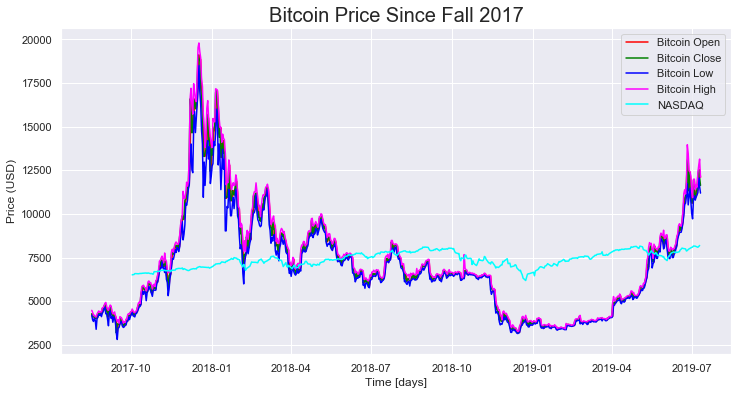

In [392]:
plt.figure(figsize=(12, 6));
plt.plot(df_BTC.Open, color='red', label='Bitcoin Open')
plt.plot(df_BTC.Close, color='green', label='Bitcoin Close')
plt.plot(df_BTC.Low, color='blue', label='Bitcoin Low')
plt.plot(df_BTC.High, color='magenta', label='Bitcoin High')
plt.plot(ndq['Index Value'], color='cyan', label='NASDAQ')
plt.title('Bitcoin Price Since Fall 2017', fontsize=20)
plt.xlabel('Time [days]')
plt.ylabel('Price (USD)')
plt.legend(loc='best')

plt.show()

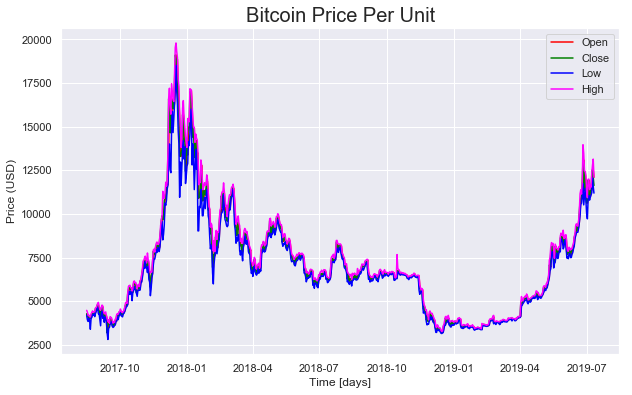

In [391]:
plt.figure(figsize=(10, 6));

plt.plot(df_BTC.Open, color='red', label='Open')
plt.plot(df_BTC.Close, color='green', label='Close')
plt.plot(df_BTC.Low, color='blue', label='Low')
plt.plot(df_BTC.High, color='magenta', label='High')
plt.title('Bitcoin Price Per Unit', fontsize=20)
plt.xlabel('Time [days]')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()



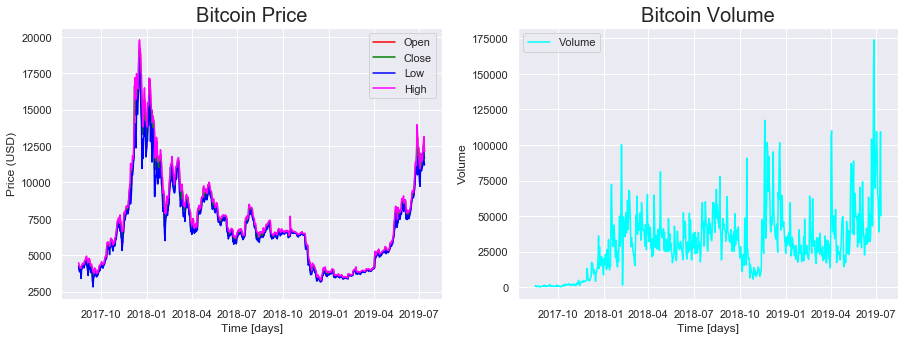

In [390]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_BTC.Open, color='red', label='Open')
plt.plot(df_BTC.Close, color='green', label='Close')
plt.plot(df_BTC.Low, color='blue', label='Low')
plt.plot(df_BTC.High, color='magenta', label='High')
plt.title('Bitcoin Price', fontsize=20)
plt.xlabel('Time [days]')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df_BTC.Volume, color='cyan', label='Volume')
plt.title('Bitcoin Volume', fontsize=20)
plt.xlabel('Time [days]')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.show()

In [ ]:
df_ms.head(3)

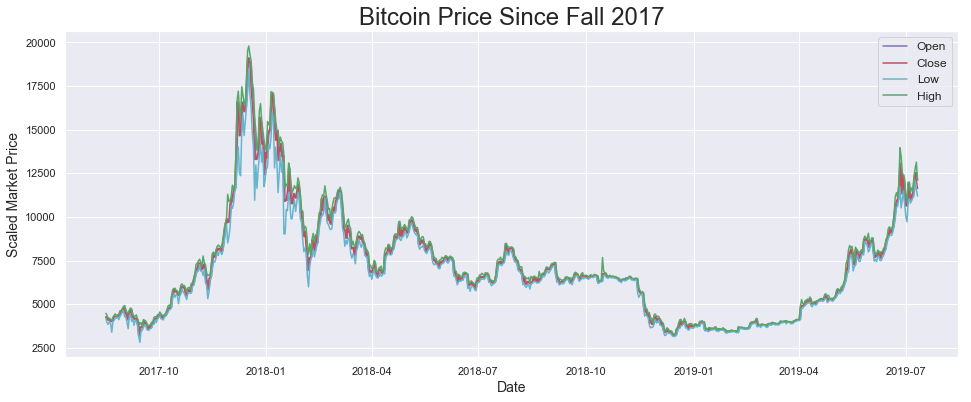

In [24]:
plt.figure(figsize=(16, 6))

plt.plot(df_BTC['Open'], color='m', label='Open')
plt.plot(df_BTC['Close'], color='r', label='Close')
plt.plot(df_BTC['Low'], color='c', label='Low')
plt.plot(df_BTC['High'], color='g', label='High')

plt.title('Bitcoin Price Since Fall 2017', fontsize=24)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Scaled Market Price', fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.show()

In [26]:
import statsmodels.api as sms

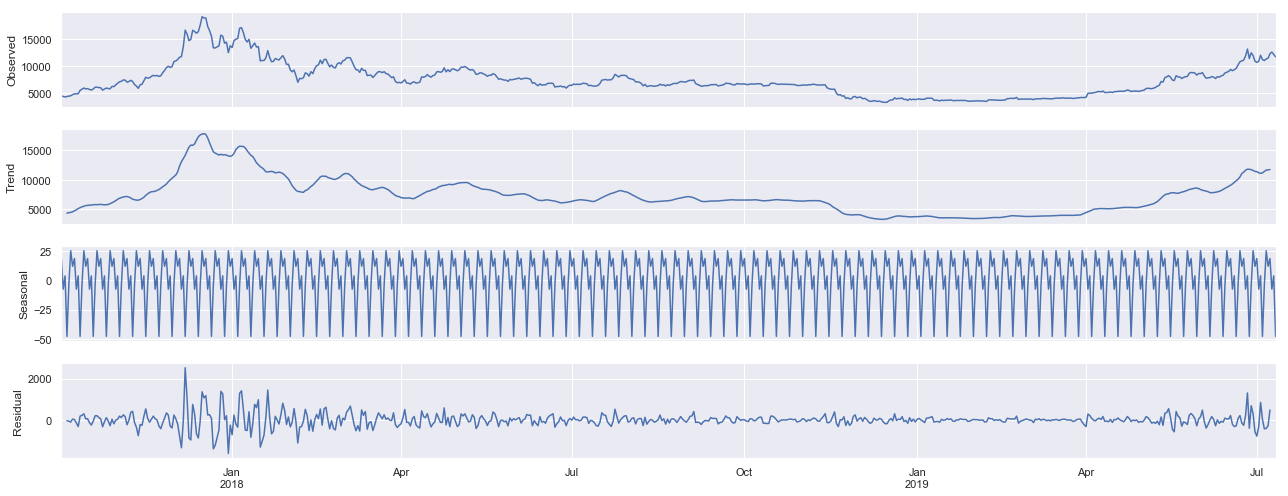

In [307]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
decomp  = sms.tsa.seasonal_decompose(df_m['Bitcoin'], model='additive')

fig = decomp.plot()
plt.show()

# Check for Stationarity

In [308]:
df_m_c =  pd.DataFrame(df_m['Bitcoin'])

In [309]:
rol_mean = df_m_c['Bitcoin'].rolling(window=7).mean()
rol_std = df_m_c['Bitcoin'].rolling(window=7).std()

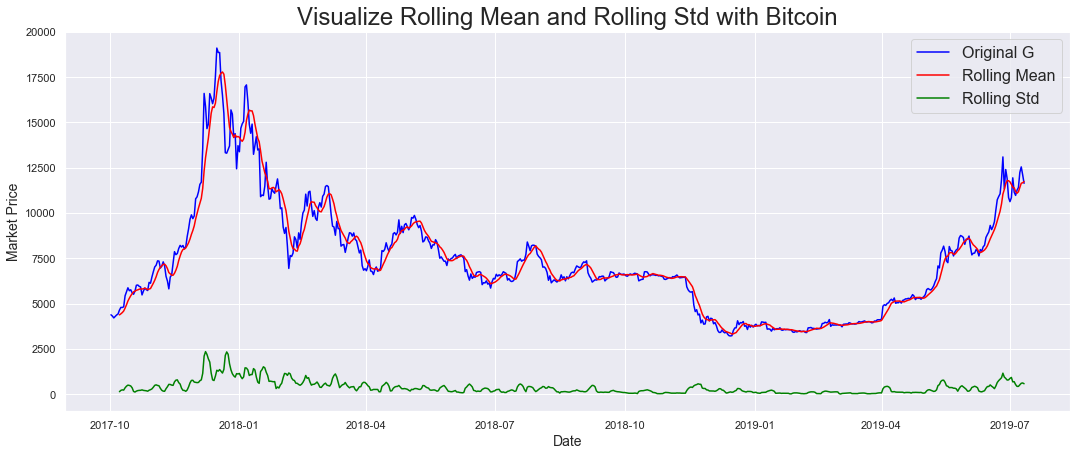

In [316]:
# Plot rolling statistics:
plt.figure(figsize=(18,7))
orig = plt.plot(df_m_c, color='blue',label='Original G')
mean = plt.plot(rol_mean, color='red',label='Rolling Mean')
std = plt.plot(rol_std, color='green',label='Rolling Std')
plt.legend(loc='best', fontsize=16)
plt.title("Visualize Rolling Mean and Rolling Std with Bitcoin", fontsize=24)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.show(block=False)


In [313]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(df_m_c['Bitcoin'],autolag='AIC')
print("Dickey-Fuller Test Results")
print("")
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print(f"Lags Used: {res[2]}")
print("")

print('Critical Values:')

for i,j in res[4].items():
    print(f"\t {i}: {j}")

Dickey-Fuller Test Results

ADF STATS: -2.0777740269782665
p-value: 0.25354517161882034
Lags Used: 20

Critical Values:
	 1%: -3.440822526288827
	 5%: -2.8661606613087542
	 10%: -2.5692307337540603


### p-value exceeds 0.05, cannot reject Ho. Lets try differencing the data

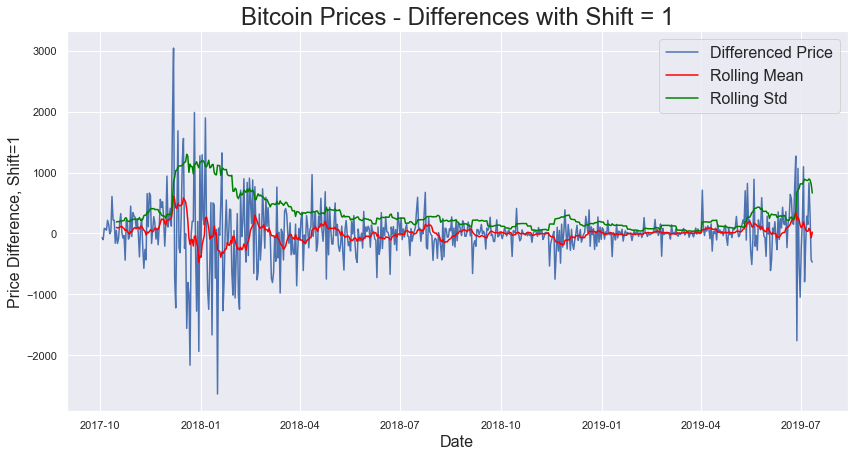

In [324]:
#Single Step
df_m_c_diff1 = df_m_c.diff(periods=1)
df_m_c_diff1 = df_m_c_diff1[1:]

rol_mean1 = df_m_c_diff1['Bitcoin'].rolling(window=14).mean()
rol_std1 = df_m_c_diff1['Bitcoin'].rolling(window=14).std()

plt.figure(figsize=(14,7))
plt.plot(df_m_c_diff1, label = 'Differenced Price')
mean = plt.plot(rol_mean1, color='red',label='Rolling Mean')
std = plt.plot(rol_std1, color='green',label='Rolling Std')
plt.title("Bitcoin Prices - Differences with Shift = 1", fontsize=24)
plt.legend(loc='best', fontsize=16)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Price Difference, Shift=1", fontsize=16)
plt.show()

In [67]:
res = adfuller(df_m_c_diff1['Close'],autolag='AIC')
print("Dickey-Fuller Test Results")
print("")
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print(f"Lags Used: {res[2]}")
print("")

print('Critical Values:')

for i,j in res[4].items():
    print(f"\t {i}: {j}")

Dickey-Fuller Test Results

ADF STATS: -4.6261389148913015
p-value: 0.00011557396211369622
Lags Used: 19

Critical Values:
	 1%: -3.440822526288827
	 5%: -2.8661606613087542
	 10%: -2.5692307337540603


In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 864x504 with 0 Axes>

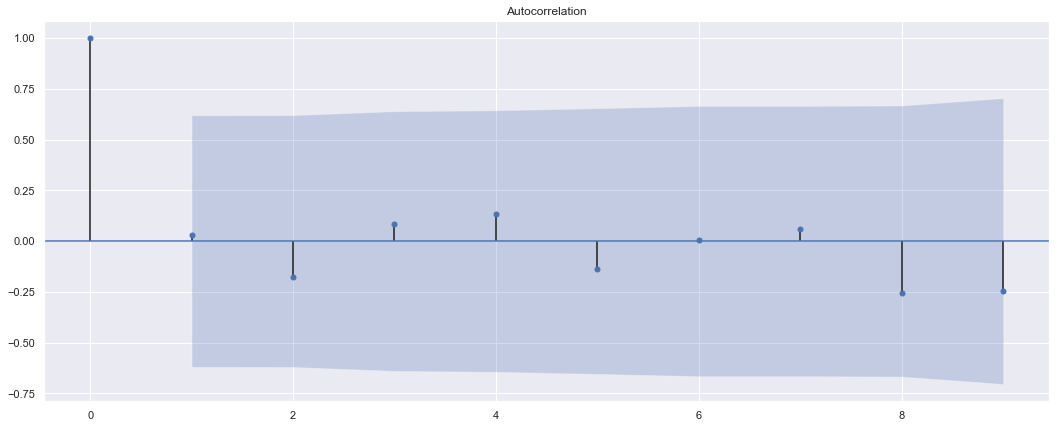

In [327]:
plt.figure(figsize=(12,7))
plot_acf(df_m_c_diff1[:10])
plt.show()

<Figure size 576x288 with 0 Axes>

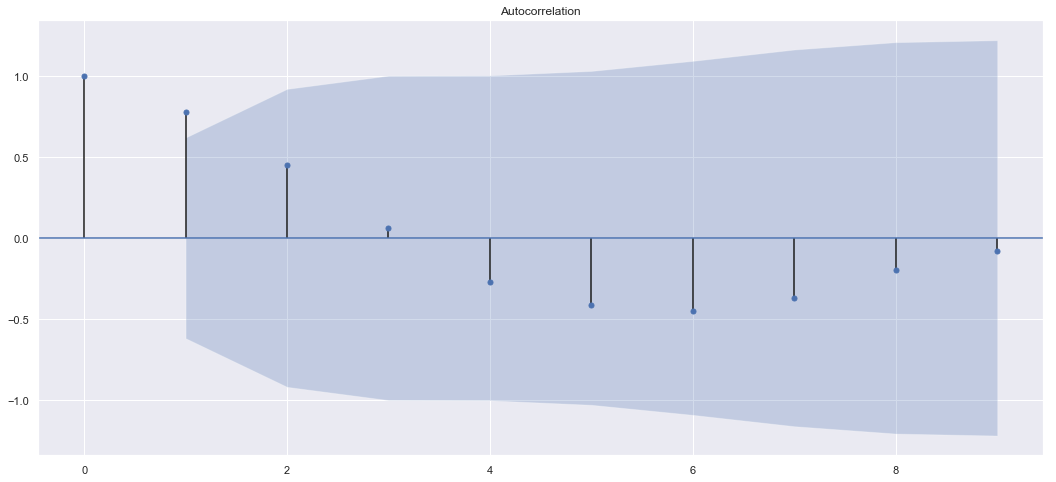

In [178]:
plt.figure(figsize=(8,4))
plot_acf(df_m_c[:10])
plt.show()

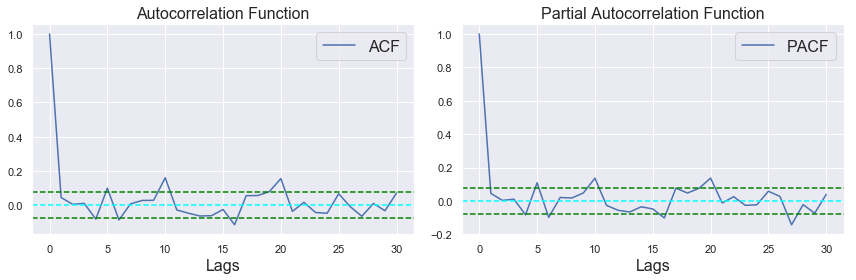

In [213]:
lag_acf = acf(df_m_c_diff1, nlags=30)
lag_pacf = pacf(df_m_c_diff1, nlags=30, method='ols')

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(lag_acf, label='ACF')
plt.axhline(y=0, linestyle='--', color='cyan')
plt.axhline(y=-1.96/np.sqrt(len(df_m_c_diff1)), linestyle='--', color='green')
plt.axhline(y=1.96/np.sqrt(len(df_m_c_diff1)), linestyle='--', color='green')
plt.legend(loc='best', fontsize=16)
plt.title("Autocorrelation Function",fontsize=16)
plt.xlabel("Lags", fontsize=16)

plt.subplot(122)
plt.plot(lag_pacf, label='PACF')
plt.axhline(y=0, linestyle='--', color='cyan')
plt.axhline(y=-1.96/np.sqrt(len(df_m_c_diff1)), linestyle='--', color='green')
plt.axhline(y=1.96/np.sqrt(len(df_m_c_diff1)), linestyle='--', color='green')
plt.legend(loc='best', fontsize=16)
plt.title("Partial Autocorrelation Function", fontsize=16)
plt.xlabel("Lags", fontsize=16)
plt.tight_layout()

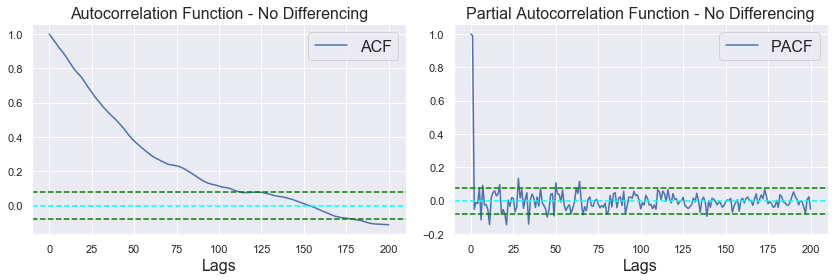

In [212]:
lag_acf = acf(df_m_c, nlags=200)
lag_pacf = pacf(df_m_c, nlags=200, method='ols')

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(lag_acf, label='ACF')
plt.axhline(y=0, linestyle='--', color='cyan')
plt.axhline(y=-1.96/np.sqrt(len(df_m_c)), linestyle='--', color='green')
plt.axhline(y=1.96/np.sqrt(len(df_m_c)), linestyle='--', color='green')
plt.legend(loc='best', fontsize=16)
plt.title("Autocorrelation Function - No Differencing",fontsize=16)
plt.xlabel("Lags", fontsize=16)

plt.subplot(122)
plt.plot(lag_pacf, label='PACF')
plt.axhline(y=0, linestyle='--', color='cyan')
plt.axhline(y=-1.96/np.sqrt(len(df_m_c)), linestyle='--', color='green')
plt.axhline(y=1.96/np.sqrt(len(df_m_c)), linestyle='--', color='green')
plt.legend(loc='best', fontsize=16)
plt.title("Partial Autocorrelation Function - No Differencing", fontsize=16)
plt.xlabel("Lags", fontsize=16)
plt.tight_layout()

In [328]:
train = df_m.loc[:'2019-04-09']
test = df_m.loc['2019-04-09':]

In [374]:
mod = sms.tsa.statespace.SARIMAX(train['Bitcoin'],order=(19, 1, 2), seasonal_order=(0, 1, 0, 7),
                                enforce_stationarity=True,
                                enforce_invertibility=False, freq='D')

results = mod.fit()
print(results.aic)
print(results.summary())


C:\Users\Tom N\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8342.598823299793
                                 Statespace Model Results                                 
Dep. Variable:                            Bitcoin   No. Observations:                  555
Model:             SARIMAX(19, 1, 2)x(0, 1, 0, 7)   Log Likelihood               -4149.299
Date:                            Fri, 12 Jul 2019   AIC                           8342.599
Time:                                    13:55:26   BIC                           8437.297
Sample:                                10-02-2017   HQIC                          8379.614
                                     - 04-09-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3057      0.147      2.074      0.038       0.017       0.595
ar.L2         -0.

Text(0, 0.5, 'Price')

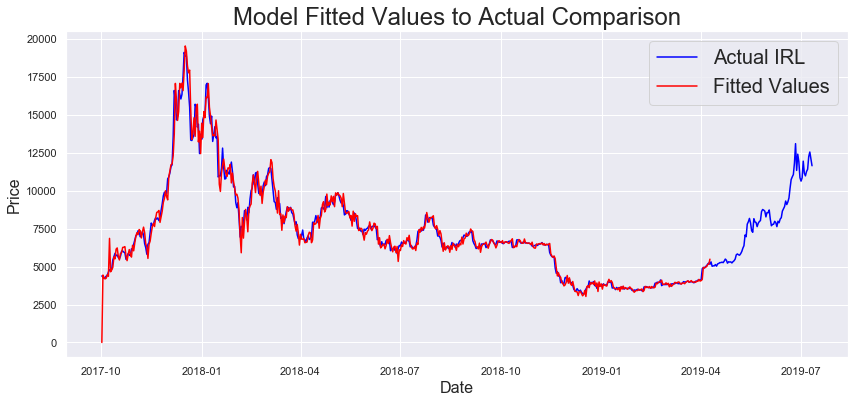

In [375]:
plt.figure(figsize=(14,6))
plt.plot(df_m['Bitcoin'], color='blue', label='Actual IRL')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best', fontsize=20)
plt.title("Model Fitted Values to Actual Comparison", fontsize=24)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)

#plt.title("RSS: %.4f" % sum((results_MA.fittedvalues - df_log_diff_shift['Close'][1:])**2))

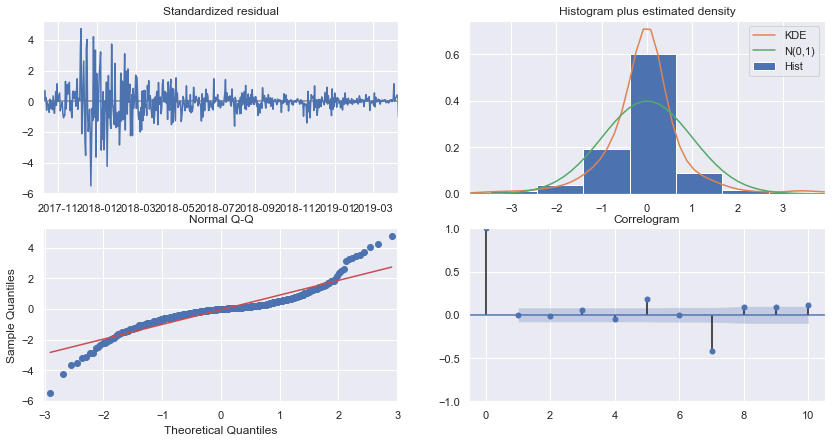

In [358]:
results.plot_diagnostics(figsize=(14, 7))
plt.show()

In [120]:
from scipy.stats import kstest

In [376]:
kstest(results.resid,'norm')

KstestResult(statistic=0.5008135552875533, pvalue=2.830404429868126e-129)

In [386]:
pred = results.get_prediction(start=pd.to_datetime('2019-04-09'), end=pd.to_datetime('2019-12-01'), dynamic=False)

In [387]:
pred_mean = pred.predicted_mean
pred_mean = pd.DataFrame(pred_mean, columns=['Mean'])

In [388]:
pred_ci = pred.conf_int()

In [384]:
future = pd.DataFrame(results.forecast(steps=30))

In [364]:
future

,0
2019-04-10,5053.270196
2019-04-11,4975.939148
2019-04-12,5066.434994
2019-04-13,5096.478985
2019-04-14,5216.433506
2019-04-15,5278.011399
2019-04-16,5187.045990
2019-04-17,5087.025385
2019-04-18,5007.026610
2019-04-19,5095.359036


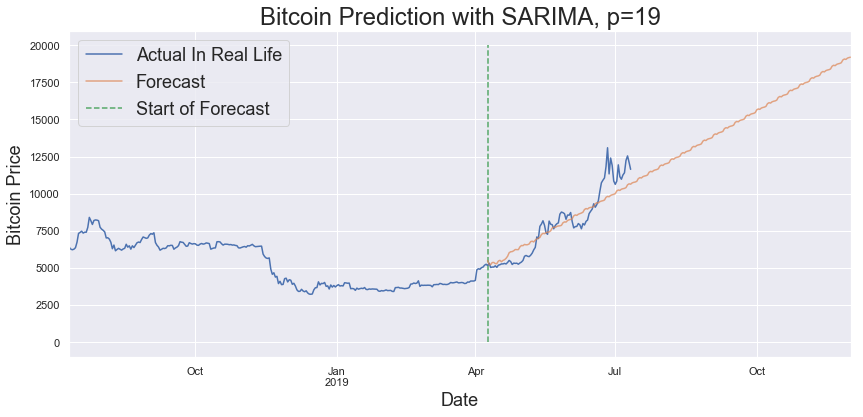

In [389]:
ax = df_BTC['Close'].loc['2018-07-11':].plot(label='Actual In Real Life')

pred_mean['Mean'].plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 6))

ax.vlines('2019-04-09', 0, 20000, linestyle='--', color='g', label='Start of Forecast')
ax.set_title('Bitcoin Prediction with SARIMA, p=19', fontsize=24)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Bitcoin Price', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

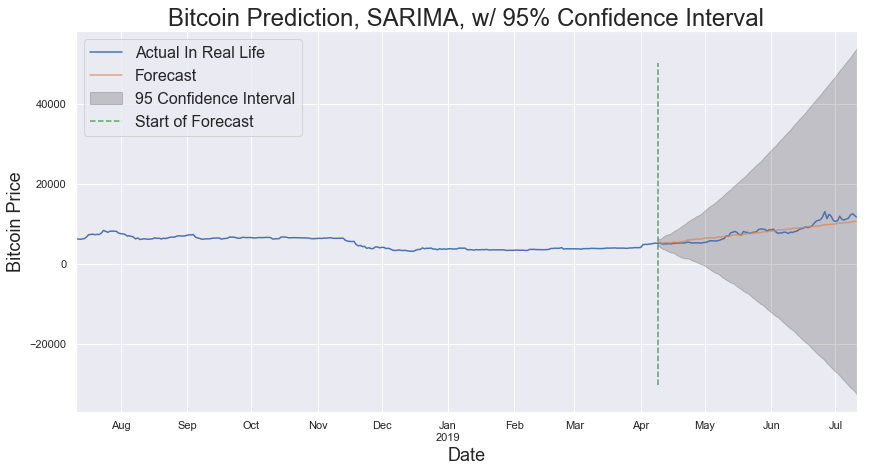

In [284]:
ax = df_BTC['Close'].loc['2018-07-11':].plot(label='Actual In Real Life')


pred_mean['Mean'].plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2, label='95 Confidence Interval')
ax.vlines('2019-04-09', -30000, 50000, linestyle='--', color='g', label='Start of Forecast')
ax.set_title('Bitcoin Prediction, SARIMA, w/ 95% Confidence Interval', fontsize=24)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Bitcoin Price', fontsize=18)
plt.legend(loc='upper left', fontsize=16)
plt.show()

# INTRODUCING EXOG

In [362]:
mod2 = sms.tsa.statespace.SARIMAX(train['Bitcoin'],order=(19, 1, 2), seasonal_order=(0, 1, 0, 7),
                                enforce_stationarity=True,
                                enforce_invertibility=False,
                                exog = train['Nasdaq'], freq='D')

results2 = mod2.fit()
print(results2.summary())

C:\Users\Tom N\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            Bitcoin   No. Observations:                  555
Model:             SARIMAX(19, 1, 2)x(0, 1, 0, 7)   Log Likelihood               -4147.672
Date:                            Fri, 12 Jul 2019   AIC                           8341.344
Time:                                    11:49:00   BIC                           8440.347
Sample:                                10-02-2017   HQIC                          8380.042
                                     - 04-09-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Nasdaq         0.2307      0.315      0.732      0.464      -0.387       0.849
ar.L1         -0.3198      0.153   

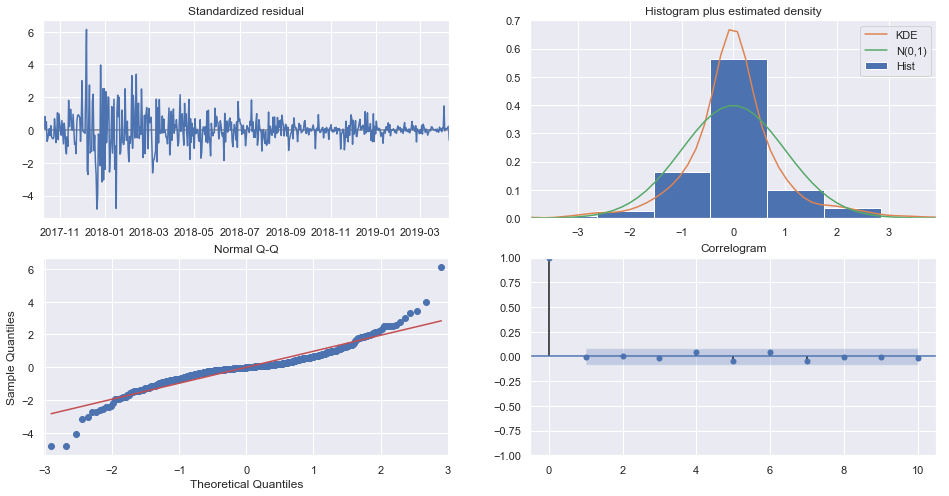

In [145]:
results2.plot_diagnostics(figsize=(16, 8))
plt.show()

In [146]:
kstest(results2.resid,'norm')

KstestResult(statistic=0.5104247318824869, pvalue=1.2279562105257672e-134)

In [157]:
exog=pd.DataFrame(test['Index Value'].iloc[:-1])
exog.shape

(93, 1)

In [159]:
pred2 = results2.get_prediction(start=pd.to_datetime('2019-04-09'), end=pd.to_datetime('2019-07-11'), dynamic=False, exog=pd.DataFrame(test['Index Value'].iloc[:-1]))

In [160]:
pred_mean2 = pred2.predicted_mean
pred_mean2 = pd.DataFrame(pred_mean2, columns=['Mean'])

In [165]:
pred_ci2 = pred2.conf_int()

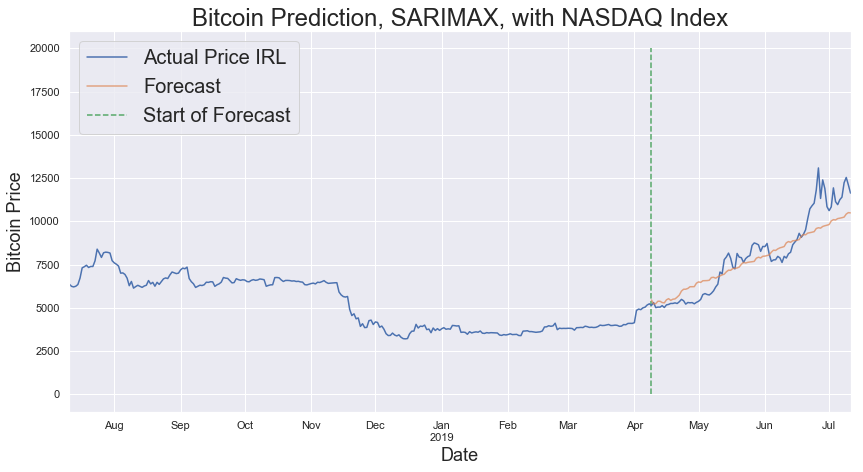

In [203]:
ax = df_BTC['Close'].loc['2018-07-11':].plot(label='Actual Price IRL')


pred_mean2['Mean'].plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.vlines('2019-04-09', 0, 20000, linestyle='--', color='g', label='Start of Forecast')
ax.set_title('Bitcoin Prediction, SARIMAX, with NASDAQ Index', fontsize=24)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Bitcoin Price', fontsize=18)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [343]:
mod3 = sms.tsa.statespace.SARIMAX(train['Bitcoin'],order=(1, 1, 1), seasonal_order=(0, 1, 0, 7),
                                enforce_stationarity=True,
                                enforce_invertibility=False, freq='D')

results3 = mod3.fit()
print(results3.aic)
print(results3.summary())

8595.876109731842
                                 Statespace Model Results                                
Dep. Variable:                           Bitcoin   No. Observations:                  555
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 7)   Log Likelihood               -4294.938
Date:                           Fri, 12 Jul 2019   AIC                           8595.876
Time:                                   11:20:03   BIC                           8608.789
Sample:                               10-02-2017   HQIC                          8600.924
                                    - 04-09-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4597      0.156     -2.947      0.003      -0.765      -0.154
ma.L1          0.5677    

In [344]:
pred3 = results3.get_prediction(start=pd.to_datetime('2019-04-09'), end=pd.to_datetime('2019-07-11'), dynamic=False)
pred_mean3 = pred3.predicted_mean
pred_mean3 = pd.DataFrame(pred_mean3, columns=['Mean'])
pred_ci3 = pred3.conf_int()

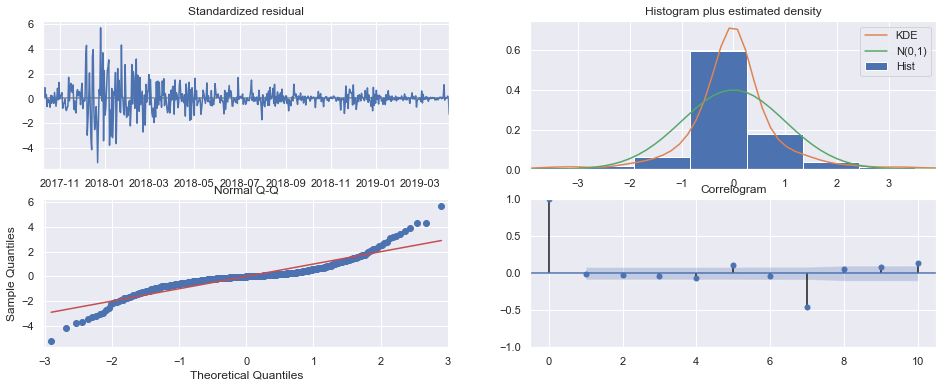

In [347]:
results3.plot_diagnostics(figsize=(16, 6))
plt.show()

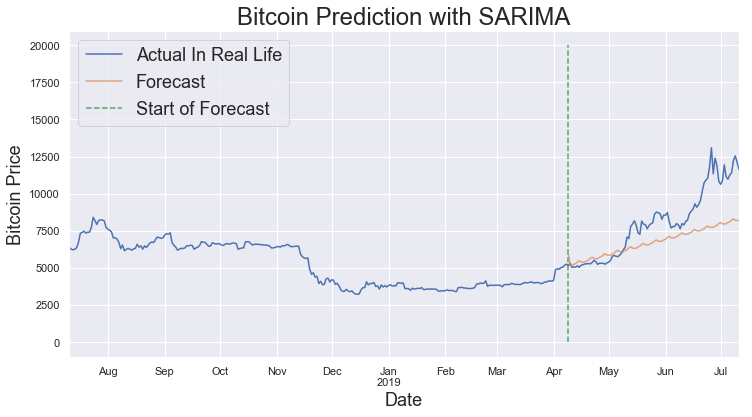

In [354]:
ax = df_BTC['Close'].loc['2018-07-11':].plot(label='Actual In Real Life')


pred_mean3['Mean'].plot(ax=ax, label='Forecast', alpha=.7, figsize=(12, 6))

ax.vlines('2019-04-09', 0, 20000, linestyle='--', color='g', label='Start of Forecast')
ax.set_title('Bitcoin Prediction with SARIMA', fontsize=24)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Bitcoin Price', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

Text(0, 0.5, 'Price')

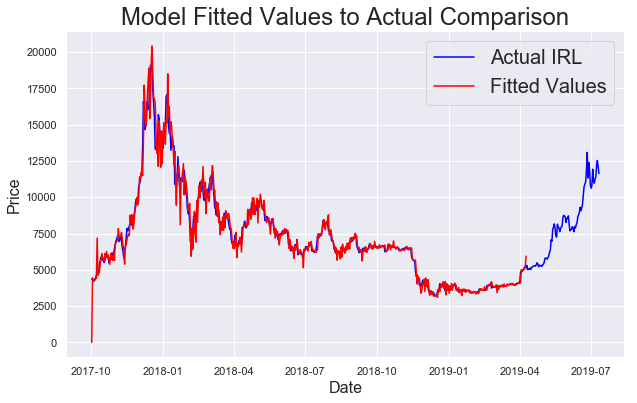

In [351]:
plt.figure(figsize=(10,6))
plt.plot(df_m['Bitcoin'], color='blue', label='Actual IRL')
plt.plot(results3.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best', fontsize=20)
plt.title("Model Fitted Values to Actual Comparison", fontsize=24)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)


In [355]:
kstest(results3.resid,'norm')

KstestResult(statistic=0.5027023180235647, pvalue=2.5622308410817012e-130)